In [ ]:
# For Google colab uncomment these lines and run them to access your drive

# from google.colab import drive
# drive.mount('/content/drive')
# import sys
#
# sys.path.insert(1, r'/content/drive/My Drive/')

In [ ]:
import numpy as np
import seaborn as sns
import torch
from matplotlib import pyplot as plt
from torch import nn
from torchvision import utils

from utils import ml_utils
from utils import models
from utils.data_loading import initialize_env
from utils.data_loading import load_fashion_mnist, load_mnist

In [35]:
initialize_env()
device = "cuda" if torch.cuda.is_available() else "cpu"
sns.set_theme()
color_map = sns.color_palette(as_cmap=True)

## Looking at the data
Lets have a first look as to what the data looks like that we're dealing with

In [36]:
def output_label(label):
    output_mapping = {
        0: "T-shirt/Top",
        1: "Trouser",
        2: "Pullover",
        3: "Dress",
        4: "Coat",
        5: "Sandal",
        6: "Shirt",
        7: "Sneaker",
        8: "Bag",
        9: "Ankle Boot"
    }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([32, 1, 28, 28]) torch.Size([32])
labels:  Trouser, Pullover, Bag, Sandal, Pullover, Shirt, Ankle Boot, Ankle Boot, Ankle Boot, Coat, T-shirt/Top, Dress, Ankle Boot, Ankle Boot, Sandal, Shirt, Sneaker, Bag, Bag, Ankle Boot, Pullover, Shirt, Ankle Boot, Dress, T-shirt/Top, Sandal, T-shirt/Top, Sneaker, Shirt, Trouser, Pullover, T-shirt/Top, 

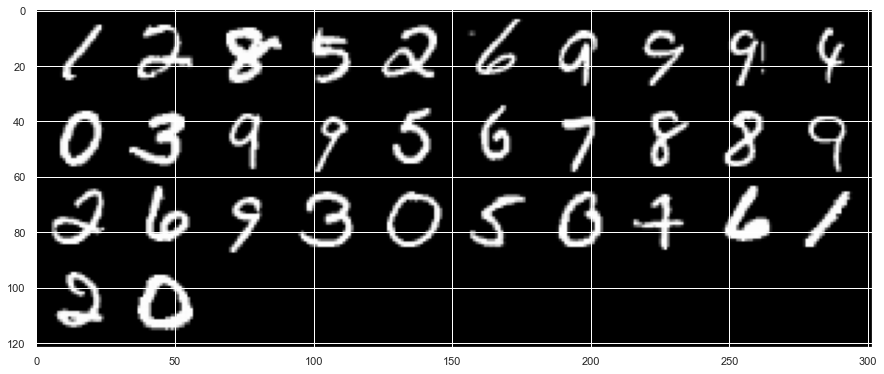

In [37]:
# demo_loader, _ = load_fashion_mnist(batch_size=10)
demo_loader, _ = load_mnist()

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)
grid = utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

## Different batchsizes at fixed learning rate

Epoch= 1,	 batch = 0,	 cost = 2.3019,	 accuracy = 0.125
Epoch= 1,	 batch = 200,	 cost = 1.7632,	 accuracy = 0.71875
Epoch= 1,	 batch = 400,	 cost = 1.7934,	 accuracy = 0.65625
Epoch= 1,	 batch = 600,	 cost = 1.6690,	 accuracy = 0.78125
Epoch= 1,	 batch = 800,	 cost = 1.7425,	 accuracy = 0.71875
Epoch= 1,	 batch = 1000,	 cost = 1.6288,	 accuracy = 0.84375
Epoch= 1,	 batch = 1200,	 cost = 1.6592,	 accuracy = 0.8125
Epoch= 1,	 batch = 1400,	 cost = 1.5892,	 accuracy = 0.875
Epoch= 1,	 batch = 1600,	 cost = 1.7698,	 accuracy = 0.6875
Epoch= 1,	 batch = 1800,	 cost = 1.7951,	 accuracy = 0.65625
[Epoch:    1], averaged cost = 1.72628129
Epoch= 2,	 batch = 0,	 cost = 1.8643,	 accuracy = 0.5625
Epoch= 2,	 batch = 200,	 cost = 1.5560,	 accuracy = 0.90625
Epoch= 2,	 batch = 400,	 cost = 1.6517,	 accuracy = 0.8125
Epoch= 2,	 batch = 600,	 cost = 1.7426,	 accuracy = 0.71875
Epoch= 2,	 batch = 800,	 cost = 1.5939,	 accuracy = 0.84375
Epoch= 2,	 batch = 1000,	 cost = 1.6895,	 accuracy = 0.78125
Epoc

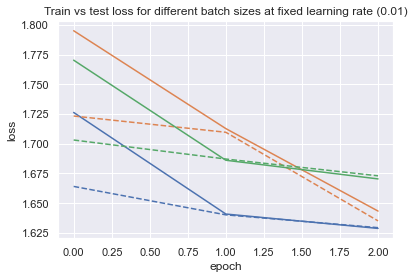

In [38]:
models_dict_fixed = {}
batch_sizes = [32, 64, 128, 256, 512, 1024]
# batch_sizes = [32, 64, 128]
lr = 0.001
training_epochs = 10

In [ ]:
for i, batch_size in enumerate(batch_sizes):
    models_dict_fixed[batch_size] = {}
    train_dataloader, test_dataloader = load_fashion_mnist(batch_size=batch_size)
    model = models.MnistCnn()
    if device == "cuda":
        model.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

    results_dict = ml_utils.train(train_dataloader, test_dataloader, batch_size, model, optimizer, criterion, lr,
                                  training_epochs, device)
    models_dict_fixed[batch_size]["results"] = results_dict

    plt.plot(results_dict["train_loss"], label=f"{batch_size} - train", color=color_map[i])
    plt.plot(results_dict["test_loss"], label=f"{batch_size} - test", linestyle="--", color=color_map[i])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.suptitle('Train vs test loss for different batch sizes at fixed learning rate (0.01)')
plt.title(f'Learning rate = {lr}')
plt.legend()
plt.show()

## Different batchsizes with linear learning rate
Up the learning rate linearly according to the batch size.

In [ ]:
models_dict_linear = {}
batch_sizes = [32, 64, 128, 256, 512, 1024]
learning_rates = [0.001, 0.002, 0.004, 0.008, 0.016, 0.032]
training_epochs = 10

In [ ]:
for i, (batch_size, lr) in enumerate(zip(batch_sizes, learning_rates)):
    models_dict_linear[batch_size] = {}
    train_dataloader, test_dataloader = load_fashion_mnist(batch_size=batch_size)
    model = models.MnistCnn()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

    train_results_dict = ml_utils.train(train_dataloader, test_dataloader, batch_size, model, optimizer, criterion, lr,
                                        training_epochs, device)
    models_dict_linear[batch_size][lr] = train_results_dict

    plt.plot(results_dict["train_loss"], label=f"{batch_size} - {lr} - train", color=color_map[i])
    plt.plot(results_dict["test_loss"], label=f"{batch_size} - {lr} - test", linestyle="--", color=color_map[i])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train vs test loss for different batch sizes with linear increasing learning rate')
plt.legend()
plt.show()

## SAM

In [ ]:
models_dict_sam = {}
batch_sizes = [32, 64, 128, 256, 512, 1024]
lr = 0.001
training_epochs = 10

for i, batch_size in enumerate(batch_sizes):
    models_dict_sam[batch_size] = {}
    train_dataloader, test_dataloader = load_fashion_mnist(batch_size=batch_size)
    model = models.MnistCnn()
    if device == "cuda":
        model.cuda()

    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD

    results_dict = ml_utils.train_sam(train_dataloader, test_dataloader, batch_size, model, optimizer, criterion, lr,
                                      training_epochs, device)
    models_dict_sam[batch_size]["results"] = results_dict

    plt.plot(results_dict["train_loss"], label=f"{batch_size} - train", color=color_map[i])
    plt.plot(results_dict["test_loss"], label=f"{batch_size} - test", linestyle="--", color=color_map[i])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Train vs test loss for different batch sizes with SAM')
plt.legend()
plt.show()